In [717]:
import pandas as pd
import os
import datetime as dt
import numpy as np
import math
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import matplotlib.dates as mdates



In [4]:
os.chdir('C:\\Users\\LinR1\Desktop')

In [718]:
pd.options.mode.chained_assignment = None
df = pd.read_csv('Book1.csv',parse_dates = ['Contractmth'], dayfirst = True)
# create month dataframe
start = dt.datetime(2017,1,1)
end = dt.datetime(2030,1,1)
df_m = pd.DataFrame(pd.date_range(start,end, freq = 'MS'), columns=['Month'])

In [719]:
df_jkm = pd.merge(df_m,df, left_on = 'Month', right_on = 'Contractmth', how = 'left' )
df_jkm['month'] = df_jkm['Month'].dt.month

In [720]:
change = lambda x: x/x.shift()
df_jkm['PriceChange'] = df_jkm['Price'].groupby(df_jkm['month']).transform(change)
df_jkm['MthAvg'] = df_jkm['PriceChange'].groupby(df_jkm['month']).transform(np.nanmean)

In [721]:
df_jkm = df_jkm.sort_values(by =['month','Contractmth'])
df_jkm = df_jkm.set_index('Month')

In [722]:
last_index = lambda x:x. last_valid_index()
df_jkm['last_valid'] = df_jkm['Contractmth'].groupby(df_jkm['month']).transform(last_index)
df_jkm['tvalue'] = df_jkm.index


In [723]:
df_jkm['diff'] = df_jkm['tvalue'].dt.year.astype(int) - df_jkm['last_valid'].dt.year.astype(int)

In [724]:
df_jkm['power'] = [None] * df_jkm.shape[0]
df_jkm['Curve'] =[None] * df_jkm.shape[0]
for i in range(df_jkm.shape[0]):
    if df_jkm['diff'][i] <= 0:
        df_jkm['power'][i] = 0
        df_jkm['Curve'][i] = 'Actual'
    else:
        df_jkm['power'][i] = df_jkm['diff'][i]
        df_jkm['Curve'][i] = 'Forecast'

In [725]:
df_jkm['Price'] = df_jkm['Price'].fillna(method = 'ffill')

In [500]:
if df['diff'] > 0:
    df_jkm['New_Price'] = math.pow(df_jkm['MthAvg'], df_jkm['diff'])
else:
    df_jkm['New_Price'] = df_jkm['Price']

KeyError: 'diff'

In [726]:
df_jkm['F_Price'] = np.multiply(np.power(df_jkm['MthAvg'], df_jkm['power']) , df_jkm['Price'])
df_jkm.head(10)   

,Contractmth,Price,month,PriceChange,MthAvg,last_valid,tvalue,diff,power,Curve,F_Price
Month,,,,,,,,,,,
2017-01-01,2017-01-01,72.53,1,NaN,1.008348,2021-01-01,2017-01-01,-4,0,Actual,72.53
2018-01-01,2018-01-01,78.50,1,1.082311,1.008348,2021-01-01,2018-01-01,-3,0,Actual,78.5
2019-01-01,2019-01-01,82.05,1,1.045223,1.008348,2021-01-01,2019-01-01,-2,0,Actual,82.05
2020-01-01,2020-01-01,65.45,1,0.797684,1.008348,2021-01-01,2020-01-01,-1,0,Actual,65.45
2021-01-01,2021-01-01,72.53,1,1.108174,1.008348,2021-01-01,2021-01-01,0,0,Actual,72.53
2022-01-01,NaT,72.53,1,NaN,1.008348,2021-01-01,2022-01-01,1,1,Forecast,73.1355
2023-01-01,NaT,72.53,1,NaN,1.008348,2021-01-01,2023-01-01,2,2,Forecast,73.746
2024-01-01,NaT,72.53,1,NaN,1.008348,2021-01-01,2024-01-01,3,3,Forecast,74.3617
2025-01-01,NaT,72.53,1,NaN,1.008348,2021-01-01,2025-01-01,4,4,Forecast,74.9824


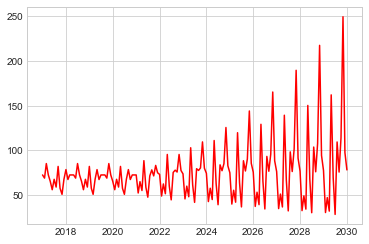

In [727]:
df = df_jkm.sort_values(by = 'tvalue')
x = df['tvalue']
y = df['F_Price']
plt.plot_date(x, y, fmt="r-")
plt.show()

In [700]:
del df_jkm['diff']
df_jkm.to_csv('result.csv')